In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_table = pd.read_csv("../assembly_evaluation_data/merged_annotation_stats.csv",index_col='SampleName')

In [3]:
false_crbb = pd.read_csv("../assembly_evaluation_data/false_crbb.csv",index_col=0)

In [4]:
false_crbb.head()

,false_crbb_num_transcripts
MMETSP1347,812
MMETSP0603,5341
MMETSP0469,101484
MMETSP1075,57113
MMETSP1369,46402


In [5]:
crbb_df = pd.merge(data_table[['total_annotated_w_false_crbb']],false_crbb[['false_crbb_num_transcripts']],
                   how='outer',left_index=True,right_index=True).dropna()

In [6]:
crbb_df.head()

,total_annotated_w_false_crbb,false_crbb_num_transcripts
MMETSP0004,2352,12265.0
MMETSP0005,1833,9950.0
MMETSP0006,4837,22569.0
MMETSP0007,1448,5599.0
MMETSP0010,4022,21159.0


In [7]:
data_table.columns

Index(['Unnamed: 0', 'n_seqs', 'total_annotation_names',
       'total_annotated_contigs', 'unique_annotations', 'total_false_crbb',
       'total_OrthoDB', 'unique_OrthoDB', 'false_crbb_OrthoDB', 'total_Pfam',
       'unique_Pfam', 'false_crbb_Pfam', 'total_Rfam', 'unique_Rfam',
       'false_crbb_Rfam', 'total_annotated_w_false_crbb'],
      dtype='object')

In [8]:
data_table_false_crbb = data_table[['SampleName','total_false_crbb','total_annotated_w_false_crbb']].dropna()

KeyError: "['SampleName'] not in index"

In [9]:
data_table_false_crbb.head()

NameError: name 'data_table_false_crbb' is not defined

(0, 30000)

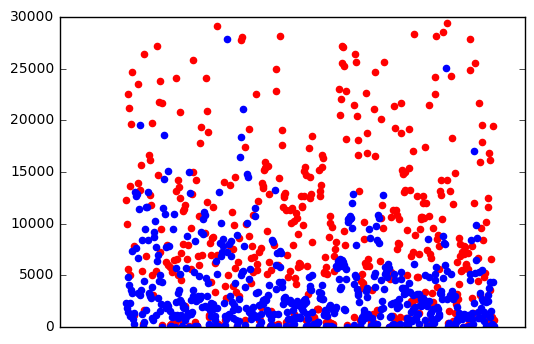

In [105]:
fig, ax = plt.subplots(1)
X = range(len(crbb_df))
Y1 = crbb_df[['false_crbb_num_transcripts']]
Y2 = crbb_df[['total_annotated_w_false_crbb']]

ax.scatter(X,Y1,color="red")
ax.scatter(X,Y2,color="blue")
ax.set_xticks([])
ax.set_ylim([0,30000])

In [13]:
crbb_df['difference']=crbb_df.false_crbb_num_transcripts-crbb_df.total_annotated_w_false_crbb

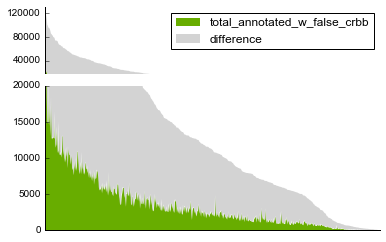

In [21]:
import matplotlib.gridspec as gridspec
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

gs = gridspec.GridSpec(3, 3)
ax = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,:])

crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[["total_annotated_w_false_crbb","difference"]].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax)
# alternative legend labels:
# transcripts absent from NCGR
# anntoated absent transcripts
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax2, legend=False)
ax.set_ylim([20000,130000])
ax2.set_ylim([0,20000])
simpleaxis(ax)
simpleaxis(ax2)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax.set_xticks([])
ax.set_yticks(np.arange(40000,120001,40000))
savefig('false_crbb.png')

In [18]:
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)

,total_annotated_w_false_crbb,false_crbb_num_transcripts,difference
MMETSP0384,27882,124330.0,96448.0
MMETSP0039,19581,117665.0,98084.0
MMETSP1377,25096,110954.0,85858.0
MMETSP0469,18359,101484.0,83125.0
MMETSP0201,15014,99473.0,84459.0
MMETSP0527,14826,96257.0,81431.0
MMETSP0472,21085,95901.0,74816.0
MMETSP0528,14473,94671.0,80198.0
MMETSP1436,17035,91310.0,74275.0
MMETSP0027,13055,86357.0,73302.0


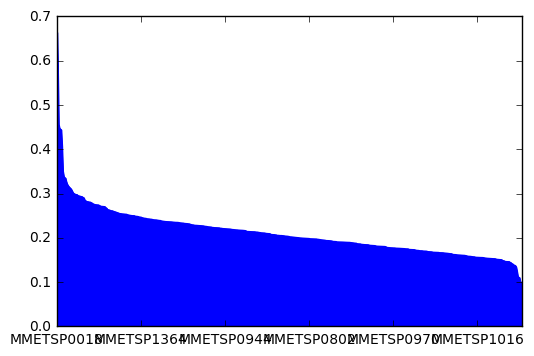

In [91]:
crbb_norm=crbb_df.T/crbb_df.false_crbb_num_transcripts
crbb_norm=crbb_norm.T
crbb_norm.total_annotated_w_false_crbb.sort_values(ascending=False).plot(kind='area', )

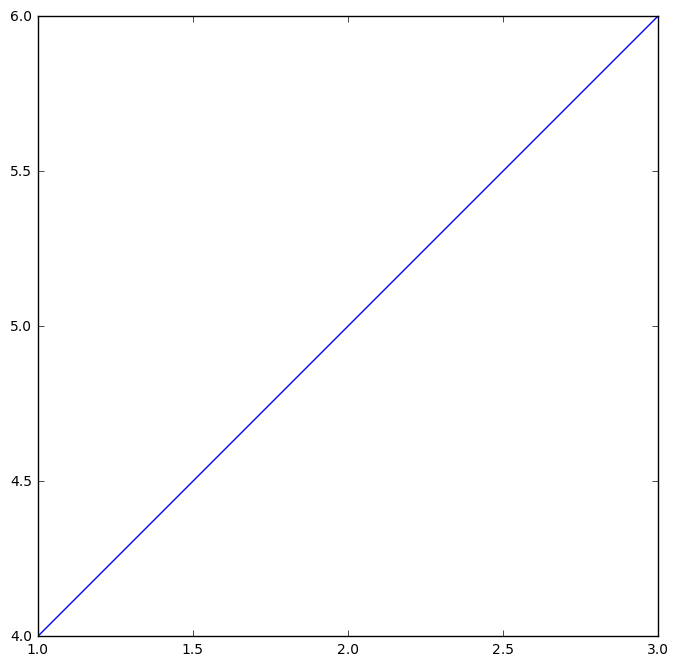

In [40]:
fig, axs= plt.subplots(1)
fig.set_size_inches(8,8)
axs.plot([1,2,3],[4,5,6])